In [2]:
# -------------------------------------------
# 🚲 인천 3대 공업단지 자전거 거치소 통합 시뮬레이션
# (부평 + 가좌 + 남동)
# -------------------------------------------

import math
import locale

# 숫자 포맷
try:
    locale.setlocale(locale.LC_ALL, 'ko_KR.UTF-8')
except:
    locale.setlocale(locale.LC_ALL, '')

def format_currency(n):
    return locale.format_string("%d", n, grouping=True)

# -------------------------------------------
# ① 공통 함수: 예산 기반 최대 설치 가능 거치소 계산
# -------------------------------------------
def calculate_max_stations(total_budget, station_cost, bike_cost, bikes_per_station):

    cost_per_unit = station_cost + (bike_cost * bikes_per_station)

    if cost_per_unit == 0:
        return {
            "max_stations": 0,
            "total_bikes": 0,
            "total_cost": 0,
            "cost_per_unit": 0,
            "budget_leftover": total_budget
        }

    max_stations = math.floor(total_budget / cost_per_unit)
    total_bikes = max_stations * bikes_per_station
    total_cost = max_stations * cost_per_unit
    leftover = total_budget - total_cost

    return {
        "max_stations": max_stations,
        "total_bikes": total_bikes,
        "total_cost": total_cost,
        "cost_per_unit": cost_per_unit,
        "budget_leftover": leftover
    }

# -------------------------------------------
# ② 공통 함수: 가중치 기반 거치소 배분
# -------------------------------------------
def allocate_stations_by_weight(zones, total_stations_to_allocate):

    total_weight = sum(zones.values())

    allocation_data = []
    assigned = 0

    # base allocation 계산
    for name, weight in zones.items():
        ideal = (weight / total_weight) * total_stations_to_allocate
        base = math.floor(ideal)
        remainder = ideal - base

        allocation_data.append({
            "name": name,
            "weight": weight,
            "base": base,
            "remainder": remainder
        })

        assigned += base

    # 남은 거치소를 remainder 큰 순대로 배분
    remaining = total_stations_to_allocate - assigned
    allocation_data.sort(key=lambda x: x["remainder"], reverse=True)

    final = {}
    for i, zone in enumerate(allocation_data):
        if i < remaining:
            final[zone["name"]] = zone["base"] + 1
        else:
            final[zone["name"]] = zone["base"]

    return final

# -------------------------------------------
# ③ 3개 공단 데이터 정의
# -------------------------------------------

# 부평 공단
BUPYEONG_WEIGHTS = {
    "작전역(계양2동)" : 10.49,
    "부평구청역 (청천2동 + 갈산2동)": 10.37,
    "부평4동": 10,
    "삼산1동": 9.55,
    "굴포천역(갈산2동+삼산2동+부평4동+부개3동)": 8.93,
    "갈산역 (청천2동 + 갈산1동)": 8.10,
    "효성1동 ": 7.98,
    "작전1동": 7.85,
    "산곡역(산곡1동+산곡2동)": 7.54,
}

# 가좌 공단
GAJWHA_WEIGHTS = {
    "재물포역(도화2,3동)" : 11,
    "주안역(주안1/5동)": 8.41,
    "시민공원역(주안1동)": 7.45,
    "인천가좌역(가좌1/3동)": 5.52,
    "서부여성회관역(석남2/3동)": 5.09,
    "도화1동": 6.72,
    "가좌2동": 5.96,
    "숭의4동": 5.37,
    "가좌4동": 3.99
}

# 남동 공단
NAMDONG_WEIGHTS = {
    "남동인더스파크역(논현2동+고잔동)" : 11,
    "인천논현역 (논현1동+논현2동+고잔동)": 10.41,
    "원인재역(연수3동)": 6.37,
    "연수역(연수1동+연수3동)": 5.01,
    "동막역(동춘2동+동춘1동)": 5.45,
    "선학동": 4.58,
    "동춘3동": 4.57,
    "연수2동": 4.99
}

# -------------------------------------------
# ④ 공단별 시뮬레이션 함수
# -------------------------------------------
def run_simulation(name, total_budget, weights):
    print(f"\n==============================")
    print(f"🚲 {name} 공업단지 시뮬레이션")
    print(f"==============================")

    STATION_COST = 1_250_000
    BIKE_COST = 650_000
    BIKES_PER_STATION = 40

    # 1단계: 예산 기반 최대 설치 가능 거치소
    budget_result = calculate_max_stations(total_budget, STATION_COST, BIKE_COST, BIKES_PER_STATION)

    print("\n[1단계] 예산 기반 최대 설치 가능 규모")
    print(f"- 총 예산: {format_currency(total_budget)} 원")
    print(f"- 유닛 당 비용: {format_currency(budget_result['cost_per_unit'])} 원")
    print(f"- 설치 가능 거치소: {budget_result['max_stations']} 개")
    print(f"- 설치 가능 자전거: {budget_result['total_bikes']} 대")

    # 2단계: 가중치 기반 배분
    print("\n[2단계] 가중치 기반 거치소 배분")

    allocated = allocate_stations_by_weight(weights, budget_result["max_stations"])

    # 결과 출력
    for zone, cnt in sorted(allocated.items(), key=lambda x: x[1], reverse=True):
        print(f"  > {zone:<25}: {cnt}개 거치소 ({cnt * BIKES_PER_STATION}대)")

    return allocated, budget_result

# -------------------------------------------
# ⑤ 세 공단 시뮬레이션 한 번에 실행
# -------------------------------------------

result_bupyeong, budget_bupyeong = run_simulation("부평", 600_000_000, BUPYEONG_WEIGHTS)
result_gajwa, budget_gajwa = run_simulation("가좌", 1_200_000_000, GAJWHA_WEIGHTS)
result_namdong, budget_namdong = run_simulation("남동", 1_800_000_000, NAMDONG_WEIGHTS)

print("\n\n🎉 3개 공단 가중치 기반 배분 자동 계산 완료!")



🚲 부평 공업단지 시뮬레이션

[1단계] 예산 기반 최대 설치 가능 규모
- 총 예산: 600,000,000 원
- 유닛 당 비용: 27,250,000 원
- 설치 가능 거치소: 22 개
- 설치 가능 자전거: 880 대

[2단계] 가중치 기반 거치소 배분
  > 작전역(계양2동)                : 3개 거치소 (120대)
  > 부평구청역 (청천2동 + 갈산2동)      : 3개 거치소 (120대)
  > 부평4동                     : 3개 거치소 (120대)
  > 삼산1동                     : 3개 거치소 (120대)
  > 굴포천역(갈산2동+삼산2동+부평4동+부개3동): 2개 거치소 (80대)
  > 갈산역 (청천2동 + 갈산1동)        : 2개 거치소 (80대)
  > 효성1동                     : 2개 거치소 (80대)
  > 작전1동                     : 2개 거치소 (80대)
  > 산곡역(산곡1동+산곡2동)           : 2개 거치소 (80대)

🚲 가좌 공업단지 시뮬레이션

[1단계] 예산 기반 최대 설치 가능 규모
- 총 예산: 1,200,000,000 원
- 유닛 당 비용: 27,250,000 원
- 설치 가능 거치소: 44 개
- 설치 가능 자전거: 1760 대

[2단계] 가중치 기반 거치소 배분
  > 재물포역(도화2,3동)             : 8개 거치소 (320대)
  > 시민공원역(주안1동)              : 6개 거치소 (240대)
  > 주안역(주안1/5동)              : 6개 거치소 (240대)
  > 도화1동                     : 5개 거치소 (200대)
  > 숭의4동                     : 4개 거치소 (160대)
  > 서부여성회관역(석남2/3동)          : 4개 거치소 (160대)
  > 가좌2동                     : 4개 거

In [3]:
import folium
from folium.plugins import MarkerCluster
import random

# -----------------------------
# ① 3개 공단의 좌표 + 거치소 개수 결합
# -----------------------------

# 가좌공단 데이터
gajwa = [
    {"name": "재물포역(도화2,3동)", "lat": 37.4668, "lon": 126.6574, "allocated_stations": 8},
    {"name": "주안역(주안1/5동)", "lat": 37.4650, "lon": 126.6800, "allocated_stations": 6},
    {"name": "시민공원역(주안1동)", "lat": 37.4583, "lon": 126.6810, "allocated_stations": 6},
    {"name": "도화1동", "lat": 37.4615, "lon": 126.6700, "allocated_stations": 5},
    {"name": "숭의4동", "lat": 37.4619, "lon": 126.6571, "allocated_stations": 4},
    {"name": "인천가좌역(가좌1/3동)", "lat": 37.4897, "lon": 126.6751, "allocated_stations": 4},
    {"name": "서부여성회관역(석남2/3동)", "lat": 37.5004, "lon": 126.6758, "allocated_stations": 4},
    {"name": "가좌4동", "lat": 37.4874, "lon": 126.6836, "allocated_stations": 4},
    {"name": "가좌2동", "lat": 37.4908207595138, "lon": 126.684849168467, "allocated_stations": 4},
]

# 부평공단 데이터
bupyeong = [
    {"name": "작전역(계양2동)", "lat": 37.5305,"lon": 126.7224,"allocated_stations": 3},
    {"name": "부평구청역 (청천2동 + 갈산2동)","lat": 37.5071,"lon": 126.7219,"allocated_stations": 3},
    {"name": "부평4동","lat": 37.5008,"lon": 126.7249,"allocated_stations": 3},
    {"name": "삼산1동","lat": 37.5221,"lon": 126.7433,"allocated_stations": 3},
    {"name": "굴포천역(갈산2동+삼산2동+부평4동+부개3동)","lat": 37.5070,"lon": 126.7313,"allocated_stations": 2},
    {"name": "갈산역 (청천2동 + 갈산1동)","lat": 37.5171,"lon": 126.7214,"allocated_stations": 2},
    {"name": "효성1동","lat": 37.5325,"lon": 126.7121,"allocated_stations": 2},
    {"name": "작전1동","lat": 37.5308,"lon": 126.7296,"allocated_stations": 2},
    {"name": "산곡역(산곡1동+산곡2동)","lat": 37.5086,"lon": 126.7035,"allocated_stations": 2}
]


# 남동공단 데이터
namdong = [
    {"name": "남동인더스파크역", "lat": 37.407368, "lon": 126.694854, "allocated_stations": 14},
    {"name": "인천논현역", "lat": 37.400696, "lon": 126.722382, "allocated_stations": 13},
    {"name": "원인재역", "lat": 37.407368, "lon": 126.694854, "allocated_stations": 8},
    {"name": "동막역", "lat": 37.398893, "lon": 126.672685, "allocated_stations": 7},
    {"name": "연수역", "lat": 37.407368, "lon": 126.694854, "allocated_stations": 6},
    {"name": "선학동", "lat": 37.422448, "lon": 126.701386, "allocated_stations": 6},
    {"name": "연수2동", "lat": 37.411600, "lon": 126.681807, "allocated_stations": 6},
    {"name": "동춘3동", "lat": 37.408297, "lon": 126.678258, "allocated_stations": 6},
]

# ---------------------------------------------------------
# ② 지도 생성
# ---------------------------------------------------------
m = folium.Map(location=[37.47, 126.69], zoom_start=12)

layer_gajwa = folium.FeatureGroup(name="가좌공업단지")
layer_bupyeong = folium.FeatureGroup(name="부평공업단지")
layer_namdong = folium.FeatureGroup(name="남동공업단지")

cluster_gajwa = MarkerCluster().add_to(layer_gajwa)
cluster_bupyeong = MarkerCluster().add_to(layer_bupyeong)
cluster_namdong = MarkerCluster().add_to(layer_namdong)

colors = {
    "gajwa": "blue",
    "bupyeong": "green",
    "namdong": "red",
}

# ---------------------------------------------------------
# ③ 마커 찍는 함수
# ---------------------------------------------------------
def add_markers(data_list, cluster, color):
    for zone in data_list:
        for i in range(zone["allocated_stations"]):

            lat_offset = (random.random() - 0.5) * 0.03
            lon_offset = (random.random() - 0.5) * 0.03

            final_lat = zone["lat"] + lat_offset
            final_lon = zone["lon"] + lon_offset

            folium.Marker(
                location=[final_lat, final_lon],
                popup=f"{zone['name']} #{i+1}",
                icon=folium.Icon(color=color, icon="bicycle", prefix="fa")
            ).add_to(cluster)

# 마커 추가
add_markers(gajwa, cluster_gajwa, colors["gajwa"])
add_markers(bupyeong, cluster_bupyeong, colors["bupyeong"])
add_markers(namdong, cluster_namdong, colors["namdong"])


# ---------------------------------------------------------
# ④ 공단 박스(Rectangle) 추가 — 중심 좌표 기반
# ---------------------------------------------------------

# 📌 가좌공업단지 Rectangle (중심: 37.4915, 126.6689)
center_gajwa = [37.4890616076963, 126.667770036895]
gajwa_bounds = [
    [center_gajwa[0] - 0.015, center_gajwa[1] - 0.02],   # 남서
    [center_gajwa[0] + 0.015, center_gajwa[1] + 0.02],   # 북동
]
folium.Rectangle(
    bounds=gajwa_bounds,
    color="red",
    weight=3,
    fill=True,
    fill_opacity=0.12,
    tooltip="가좌공업단지"
).add_to(m)


# 📌 부평공업단지 Rectangle (중심: 37.5177, 126.7192)
center_bupyeong = [37.5177, 126.7192]
bupyeong_bounds = [
    [center_bupyeong[0] - 0.02, center_bupyeong[1] - 0.02],
    [center_bupyeong[0] + 0.02, center_bupyeong[1] + 0.02],
]
folium.Rectangle(
    bounds=bupyeong_bounds,
    color="red",
    weight=3,
    fill=True,
    fill_opacity=0.12,
    tooltip="부평공업단지"
).add_to(m)


# 📌 남동국가산업단지 Rectangle (중심: 37.39996, 126.69440)
center_namdong = [37.39996088673803, 126.69440970809886]
namdong_bounds = [
    [center_namdong[0] - 0.03, center_namdong[1] - 0.03],
    [center_namdong[0] + 0.03, center_namdong[1] + 0.03],
]
folium.Rectangle(
    bounds=namdong_bounds,
    color="red",
    weight=3,
    fill=True,
    fill_opacity=0.12,
    tooltip="남동국가산업단지"
).add_to(m)


# ---------------------------------------------------------
# ⑤ 레이어 추가 + 체크박스 자동 표시
# ---------------------------------------------------------
m.add_child(layer_gajwa)
m.add_child(layer_bupyeong)
m.add_child(layer_namdong)
folium.LayerControl(collapsed=False).add_to(m)

# ---------------------------------------------------------
# ⑥ 저장
# ---------------------------------------------------------
m.save("인천_3대_공업단지_통합지도.html")
m

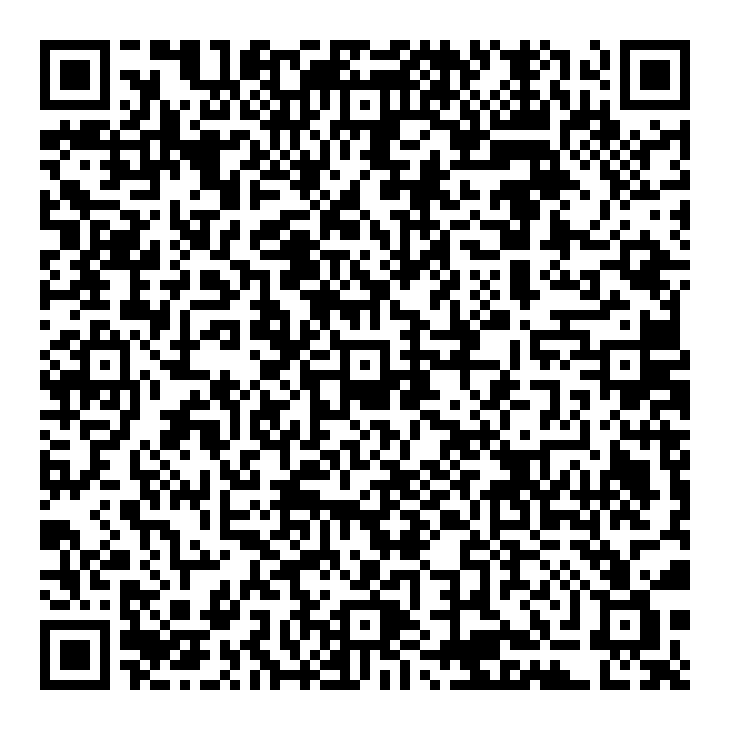

In [11]:
!pip install qrcode pillow

import qrcode

# QR로 만들 URL
url = "https://rl-mark01.github.io/incheon-bike-map/%EA%B3%B5%EC%97%85%EB%8B%A8%EC%A7%80%EC%A0%84%EC%B2%B4_%EC%9E%90%EC%A0%84%EA%B1%B0_%EA%B2%B0%EA%B3%BC_%EC%A7%80%EB%8F%84.html"

# QR 코드 생성
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_H,  # 오류 복원율 높음 (인쇄용)
    box_size=10,
    border=4,
)

qr.add_data(url)
qr.make(fit=True)

# 이미지 생성
img = qr.make_image(fill_color="black", back_color="white")

# 저장
img.save("공업단지_자전거지도_QR.png")

img

In [12]:
from IPython.display import FileLink

FileLink("공업단지_자전거지도_QR.png")

C:\Users\viery\공업단지_자전거지도_QR.png